### Getting the data

In [5]:
import os
import pandas as pd

def symbol_to_path(symbol, base_dir="../data"):
    # Return CSV file path given ticker symbol.
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    # Read stock data (adjusted close) for given symbols from CSV files.
    stock_df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # Read and join data for each symbol
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col = 'Date', parse_dates = True,
        usecols = ['Date', 'Adj Close'], na_values = ['nan'])
        
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        stock_df = stock_df.join(df_temp)
        if symbol == 'SPY':
            stock_df = stock_df.dropna(subset=['SPY'])
    return stock_df

### Plotting the data

In [6]:
import matplotlib.pyplot as plt

def plot_data(df, title = 'Stock Prices'):
    ax = df.plot(title = title, fontsize = 2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()    

### Read the data

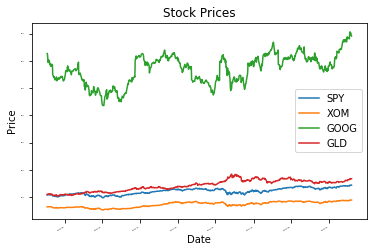

In [7]:
dates = pd.date_range('2010-01-01', '2012-12-31')
symbols = ['SPY', 'XOM', 'GOOG', 'GLD']
df = get_data(symbols, dates)
plot_data(df)

### Compute global statistic

In [8]:
print('Mean:\n', df.mean())
print('Median:\n', df.median())
print('STD:\n', df.std())

Mean:
 SPY     121.711206
XOM      73.296221
GOOG    568.941941
GLD     142.603279
dtype: float64
Median:
 SPY     123.305
XOM      76.440
GOOG    578.845
GLD     146.440
dtype: float64
STD:
 SPY     11.626556
XOM     10.168104
GOOG    54.068129
GLD     20.562938
dtype: float64


### Computing rolling statistic

In [9]:
# Read the data
dates = pd.date_range('2012-01-01', '2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)

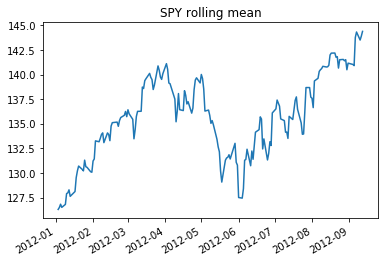

In [10]:
# Plot SPY data
ax = df['SPY'].plot(title = 'SPY rolling mean', label = 'SPY')
plt.show()

In [11]:
# Compute rolling mean using a 20-day window
rm_SPY = pd.rolling_mean(df['SPY'], window = 20)

/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  from ipykernel import kernelapp as app


In [12]:
# Add rolling mean to the same plot
rm_SPY.plot(label = 'Rolling mean', ax=ax)

# Add axis labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(loc = 'upper left')
plt.show()

### Calculate Bollinger Bands

/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  app.launch_new_instance()
/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()


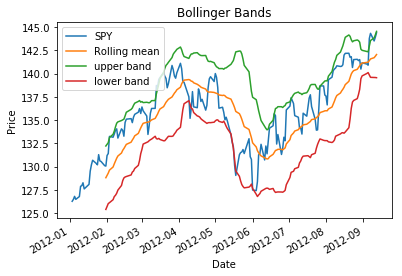

In [13]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return pd.rolling_mean(values, window=window)

def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    return pd.rolling_std(values, window=window)

def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    upper_band = rm + rstd*2
    lower_band = rm - rstd*2
    return upper_band, lower_band

# Read data
dates = pd.date_range('2012-01-01', '2012-12-31')
symbols = ['SPY']
df = get_data(symbols, dates)

# Compute Bollinger Bands

# 1. Compute rolling mean
rm_SPY = get_rolling_mean(df['SPY'], window=20)

# 2. Compute rolling standard deviation
rstd_SPY = get_rolling_std(df['SPY'], window=20)

# 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
# Plot raw SPY values, rolling mean and Bollinger Bands
ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
rm_SPY.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()


### Compute daily returns

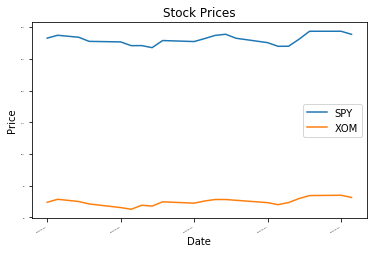

/Users/azadesanjari/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


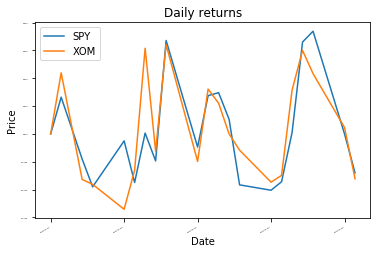

In [14]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:] / df[ : -1].values) - 1 
    daily_returns.ix[0, : ] = 0 # Set daily returns for row 0 to 0
    return daily_returns

# Read data
dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
symbols = ['SPY','XOM']
df = get_data(symbols, dates)
plot_data(df)

# Compute daily returns
daily_returns = compute_daily_returns(df)
# Plot daily returns
plot_data(daily_returns, title='Daily returns')
    

### Compute cumulative returns